### Задание 1 (4 балла)
### Обратный порядок слов в блоках текста

#### Дан текстовый файл, каждое предложение которого занимает одну строку. Напишите программу, которая разделяет текст на блоки — каждый блок состоит из нескольких предложений. Затем переворачивает порядок слов только внутри каждого предложения, не меняя порядок самих предложений в блоке.

Файл содержит:

    Привет как дела
    На улице идет дождь
    Я люблю программирование

Критерии оценки:

    Текст разделен на блоки корректно — 2 балла.
    Корректно перевернуты блоки — 2 балла.


Создаем файл формата .txt, содержащий строки, указанные в здании

![image.png](attachment:image.png)

In [4]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving 1.txt to 1.txt


In [6]:
import os

# Выведите список файлов в текущей директории
print(os.listdir())

['.config', '1.txt', 'sample_data']


In [7]:
import os
print(os.getcwd())

/content


In [8]:
# Код решения задачи № 1

# Переменная, содеражщая путь к файлу
file_path = '/content/1.txt'

# Код для чтения содержания файла построчно, с учетом кодировки utf-8
with open(file_path, "r", encoding="utf-8") as file:
    file_lines = file.readlines()

# проверяем корректность чтения строк.
# Строки считаны в виде списка, элементами которого явлюятся отдельне предложения, включая символ переноса строки \n

# Делим предложения на блоки, по 2 предложения в блоке. В качестве блока будет использована структура данных - список.

blocks_count = 2
blocks = [file_lines[i:i+2] for i in range(0, len(file_lines), blocks_count)]

# проверяем корректность деления предложений на блоки
print(f'-----------------Проверка корректноти деления на блоки--------------------------')
for block_num, block in enumerate(blocks):
	print(f'блок № {block_num+1}, содержание блока: {block}, длинна блока: {len(block)}')

# проверяем корректность обратного порядка слов в предложении
print(f'-----------------Выввод предложений в обратном порядке--------------------------')
for block_num, block in enumerate(blocks):
	for sentense in block:
            split_sentense = sentense.split()
            split_sentense = split_sentense[::-1]
            split_sentense = " ".join(split_sentense)
            print(split_sentense)


-----------------Проверка корректноти деления на блоки--------------------------
блок № 1, содержание блока: ['Привет как дела\n', 'На улице идет дождь\n'], длинна блока: 2
блок № 2, содержание блока: ['Я люблю программирование'], длинна блока: 1
-----------------Выввод предложений в обратном порядке--------------------------
дела как Привет
дождь идет улице На
программирование люблю Я


### Задание 2 (2 балла)

#### Напишите функцию, которая принимает строку и сжимает её определённым образом. Строки содержат произвольные символы, включая пробелы и спецсимволы, и требуют точного учета длины при кодировании. Сжатие строки происходит сериями одинаковых символов в формате символколичество, но только если длина сжатой строки не превышает исходную.

Примеры:

    вход: aaabbc → вывод: a3b2c,
    вход: abcd → вывод: abcd (так как сжатая равна).

Критерии оценки:

    Корректно очищен текст — 1 балл.
    Выполняется условие — 1 балл.


In [9]:
def compress_string(s):
	if not s:
		return s  # Возвращаем пустую строку, если входная строка пуста

	s_split = list(s)

	compressed = []
	count = 1

    # Проходим по строке и подсчитываем повторы символов
	for i in range(1, len(s)):
		if s[i] == s[i - 1]:
			count += 1
		else:
			compressed.append(f"{s[i - 1]}{count}")
			count = 1

    # Добавляем последнюю серию
	compressed.append(f"{s[-1]}{count}")

    # Преобразуем сжатую строку в итоговый формат
	compressed_string = ''.join(compressed)

    # Возвращаем сжатую строку только если она короче или равна исходной
	return compressed_string if len(compressed_string) < len(s) else s


#!  @  #  $  %  ^  &  *  (  )  -  _  =  +  [  ]  {  }  |  \
#:  ;  "  '  <  >  ,  .  ?  /  ~  `


# Примеры использования
# Вывод: "a3b2c4"

print(compress_string("aabbbbcc"))
print(compress_string("abc"))       # Вывод: "abc" (сжатая строка длиннее исходной)
print(compress_string("aabbcc"))    # Вывод: "aabbcc" (длина одинаковая)
print(compress_string("a"))         # Вывод: "a" (одиночный символ)
print(compress_string(""))          # Вывод: "" (пустая строка)




a2b4c2
abc
aabbcc
a



### Задание 3 (4 балла) Хаотичные скобки
#### Реализуйте функцию, которая проверяет, правильно ли расставлены скобки в строке (включая круглые, квадратные и фигурные скобки).

Критерии оценки:

Функция выполняет условие — 4 балла.

In [10]:
def string_check_brackets(string):
    # Словарь для соответствия открывающих и закрывающих скобок
    matching_brackets = {')': '(', '}': '{', ']': '['}
    open_brackets_list = '({['
    close_brackets_list = ')}]'

    # Список для отслеживания скобок
    list_brackets = []

    for char in string:
        # Добавляем открытую скобку в список для отслеживания скобок
        if char in open_brackets_list:
            list_brackets.append(char)

        # При обнаржуении закрытой скобки проверяется имеется ли для нее пара в виде открытой скобки
        # если на моент проверки списко для проверки пуст или отсутсувует соответсвующа открытая скобка, то функция завершает работу, возвращая значение false
        elif char in close_brackets_list:
            if not list_brackets or list_brackets[-1] != matching_brackets[char]:

                return False
            # Если закрытой скобке находится открытая скобка, то она (откратая скобка) удаляется из списка
            list_brackets.pop()

    # Если после окончания цикла в списке остались элементы, значит последовательность из скобок не корректна, так как не для каждой скобки нашлась пара.
    return not list_brackets

# Проверка корретности работы функции, в том числе и использованием текста в строке

print(string_check_brackets("(){}[]"))
print(string_check_brackets("({[}])"))
print(string_check_brackets("{[(корректный пример)]}"))
print(string_check_brackets("(корректный(()пример))последовательности"))
print(string_check_brackets("(не корретная() последовательность"))



True
False
True
True
False


### Задание 4 (4 балла)
#### Генератор случайных паролей
Напишите функцию, которая генерирует пароль заданной длины. В реализации надо учитывать, что:

Пароль должен содержать буквы, цифры и специальные символы.

Длина пароля задается пользователем.
Критерии оценки:

In [13]:
import string
import random

def generate_password(length):
    # Поскольку пароль должен содержать хотя бы одну букву, цифру или специальный символ, то его длинна не может быть меньше или равной 3.

    if length<=3:
        return print('Пароль не может содержать менее 4 символов')


    # Определяем символы, используемые для генерации пароля : вссе буквы, все цифры, специальные символы
    letters = string.ascii_letters
    digits = string.digits
    special_chars = string.punctuation

    # Объединяем все возможные символы
    all_chars = letters + digits + special_chars

    # Гарантируем, что пароль будет содержать хотя бы одну букву, цифру и специальный символ
    password = [random.choice(letters),
                random.choice(digits),
                random.choice(special_chars)]

    # Добавляем случайные символы до достижения нужной длины c учетом того, что ранее уже добавлены 3 символа из каждой категории
    for i in range(length - 3):
        password.append(random.choice(all_chars))

    # Перемешиваем символы несколько раз (по количеству символов) для повышения случайности
    for i in range(length):
        random.shuffle(password)

    # Собираем символы в строку
    return ''.join(password)

# Пример использования
user_length = int(input("Введите длину пароля: "))
gen_password = generate_password(user_length)

print(f"Ваш пароль: {gen_password}, длина пароля: {len(gen_password)}")

Введите длину пароля: 7
Ваш пароль: Fysx>>1, длина пароля: 7


### Задание 5 (6 баллов)
#### Эмуляция работы электронной очереди
Напишите класс для симуляции работы электронной очереди, например, в банке.

Критерии оценки:

Система должна поддерживать добавление клиентов с указанием их приоритета (например, VIP, обычный) — 1 балл.

Выбор клиента для следующей обработки должен учитывать приоритет — 1 балл.

Реализуйте отчет для администрации с информацией, сколько времени заняло обслуживание клиентов — 4 балла.

In [14]:
import time
from queue import PriorityQueue
import random

class Client:
    def __init__(self, name, priority):
        self.name = name
        self.priority = priority  # Приоритет клиента определяется числом: чем менбше число, тем болший приоритет
        self.service_time = 0  # Время обслуживания

    def __repr__(self):
        return f"Client(name={self.name}, priority={self.priority})"

class ElectronicQueue:
    def __init__(self):
        self.queue = PriorityQueue()  # Очередь с приоритетом
        self.total_service_time = 0  # Инициализация общего времени обслуживания

    def add_client(self, client):
        self.queue.put((client.priority, client))  # Добавляем клиента в очередь с указанием приоритета

    def serve_next(self):
        if not self.queue.empty():
            _, client = self.queue.get()

            # Фиксируем время начала обслуживания
            start_time = time.time()

            # Имитация обслуживание клиента (в ределах от 3 до 10 сек.)

            time.sleep(random.randint(3,10))
            # Фиксация времени окончания обслуживания

            end_time = time.time()

            client.service_time = end_time - start_time

            # Вычсиление общего количества времени обслужваиния
            self.total_service_time += client.service_time


            print(f"Обслужен клиент: {client.name} (Приоритет: {client.priority}) - Время обслуживания: {client.service_time:.2f} секунд")
        else:
            print("Очередь пуста!")

    def generate_report(self):
        print(f"Общее время обслуживания всех клиентов: {self.total_service_time:.2f} секунд")

# Пример использования:
queue = ElectronicQueue()

# Клиенты 1 очереди:
print('Обслуживание 1 очереди....')
queue.add_client(Client("Иван Иванов", 2))  # Обычный клиент
queue.add_client(Client("Петр Петров", 1))  # VIP клиент
queue.add_client(Client("Мария Смирнова", 8))  # Обычный клиент
queue.add_client(Client("Мария М", 7))  # Обычный клиент
queue.add_client(Client("Мария Смирнова", 0))  # VIP клиент

# Обслуживание клиентов 1 очереди:
queue.serve_next()  # Обслужить клиента с наивысшим приоритетом
queue.serve_next()  # Обслужить следующего клиента
queue.serve_next()  # Обслужить последнего клиента
queue.serve_next()  # Обслужть последнего клиента
queue.serve_next()  # Обслужить последнего клиента
print('Обслуживание 1 очереди закончено')

# Клиенты 2 очереди
print('Обслуживание 2 очереди....')
queue.add_client(Client("Иван Иванов", 8))  # Обычный клиент
queue.add_client(Client("Петр Петров", 7))  # VIP клиент
queue.add_client(Client("Мария Смирнова", 1))  # Обычный клиент

# Обслуживание клиентов 2 очереди
queue.serve_next()  # Обслужим клиента с наивысшим приоритетом
queue.serve_next()  # Обслужим следующего клиента
queue.serve_next()  # Обслужим последнего клиента
print('Обслуживание 2 очереди закончено')

# Генерируем отчет
queue.generate_report()


Обслуживание 1 очереди....
Обслужен клиент: Мария Смирнова (Приоритет: 0) - Время обслуживания: 6.00 секунд
Обслужен клиент: Петр Петров (Приоритет: 1) - Время обслуживания: 4.00 секунд
Обслужен клиент: Иван Иванов (Приоритет: 2) - Время обслуживания: 9.01 секунд
Обслужен клиент: Мария М (Приоритет: 7) - Время обслуживания: 9.01 секунд
Обслужен клиент: Мария Смирнова (Приоритет: 8) - Время обслуживания: 3.00 секунд
Обслуживание 1 очереди закончено
Обслуживание 2 очереди....
Обслужен клиент: Мария Смирнова (Приоритет: 1) - Время обслуживания: 10.01 секунд
Обслужен клиент: Петр Петров (Приоритет: 7) - Время обслуживания: 5.01 секунд
Обслужен клиент: Иван Иванов (Приоритет: 8) - Время обслуживания: 3.00 секунд
Обслуживание 2 очереди закончено
Общее время обслуживания всех клиентов: 49.05 секунд


###  Задание 6 (2 балла)
#### Проверка на «почти палиндром»
Напишите программу, которая проверяет, является ли строка палиндромом или «почти палиндромом». «Почти палиндром» означает, что можно удалить одну букву, чтобы строка стала палиндромом.

Критерии оценки:

Функция выполняет все заявленные условия — 2 балла.

In [15]:
def is_palindrome(s):
    if s == s[::-1]:
        return True

def almost_palindrome(s):
    n = len(s)
    for i in range(n):
        temp = s[:i] + s[i+1:]
        print(f'Проверка подстроки {temp}')
        if is_palindrome(temp):
            return True
    return False

def check_string(s):
    print(f'Проверка строки: {s}')
    if is_palindrome(s):
        return "Палиндром"
    elif almost_palindrome(s):
        return "Почти палиндром"
    else:
        return "Не палиндром"

s = input("Введите строку: ")
result = check_string(s)
print(f'Строка {s} это {result}')





Введите строку: розы азора
Проверка строки: розы азора
Проверка подстроки озы азора
Проверка подстроки рзы азора
Проверка подстроки роы азора
Проверка подстроки роз азора
Проверка подстроки розыазора
Проверка подстроки розы зора
Проверка подстроки розы аора
Проверка подстроки розы азра
Проверка подстроки розы азоа
Проверка подстроки розы азор
Строка розы азора это Не палиндром


### Задание 7 (9 баллов)
Задача Шредингера

Разработайте программу, которая «стирает» фрагменты текста в файле. Например:

    Пользователь указывает файл и процент текста, который нужно удалить (например, 30%).
    Программа случайно выбирает слова или части абзацев и заменяет их на пробел или ..., сохраняя общий объем документа.



В качестве тестового файла используем файл с произвольным текстом

![image.png](attachment:image.png)


In [18]:
import random

def erase_text(file_path, percent):

    # Проверка на корректный диапазон процента
    if not (0 <= percent <= 100):
        raise "Процент должен быть в диапазоне от 0 до 100."

    # Чтение содержимого файла
    with open(file_path, 'r', encoding='utf-8') as file:
        file_content = file.read()

    # Разделение текста на слова
    words = file_content.split()
    # Подсчитываем количество слов
    words_counts = len(words)
    print(f'список слов из файла: {words}, количество слов: {words_counts}')


    #Количество слов, подлежащих удалению
    word_to_erase = int((percentage / 100) * words_counts)
    print(f'Количество слов, подлежащих удалению:  {word_to_erase}')


    # Выбираем случайные индексы слов для замены из общего числа слов, в количестве слов, подлежащих удалению
    index_to_erase = random.sample(range(words_counts), word_to_erase)
    print(f'Индексы слов, подлежащие удалению:  {index_to_erase}')


    # Находим слово, соответсвующее индексу слова, подлежащего удалению.
    # В задании указано, что в результате удаления части текста, объем текста должен быть сохранен.
    # Для сохранения объем после удаления каждое слово должно быть заменено на строку из пробелов, количество которых соответсвует количеству букв
    # в удаляемом слове

    for index in index_to_erase:
            print(f'Выбранное слово для удаления: {words[index]} {len(words[index])}')
            words[index] = ' '*len(words[index])
            print(f'Слово после стирания: {words[index]} {len(words[index])}')


    # Соединяем слова обратно в текст
    modified_content = ' '.join(words)

    # Сохраняем измененный текст в новый файл
    output_file = file_path.replace('.txt', '_erased.txt')
    with open(output_file, 'w', encoding='utf-8') as file:
        file.write(modified_content)

    print(f"Текст обработан. Сохранено в файл: {output_file}")


# Пример использования
file_path = '/content/sample_data/task7.txt'  # Укажите путь к вашему файлу
percentage = 30  # Укажите процент текста для удаления
erase_text(file_path, percentage)

список слов из файла: ['Мы', 'желаем', 'счастья', 'Вам', 'Счастья', 'в', 'этом', 'мире', 'большом', 'Как', 'солнце', 'по', 'утрам', 'Пусть', 'оно', 'заходит', 'в', 'дом', 'Мы', 'желаем', 'счастья', 'вам', 'И', 'оно', 'должно', 'быть', 'таким', 'Когда', 'ты', 'счастлив', 'сам', 'Счастьем', 'поделись', 'с', 'другим'], количество слов: 35
Количество слов, подлежащих удалению:  10
Индексы слов, подлежащие удалению:  [9, 32, 21, 29, 25, 2, 5, 19, 18, 16]
Выбранное слово для удаления: Как 3
Слово после стирания:     3
Выбранное слово для удаления: поделись 8
Слово после стирания:          8
Выбранное слово для удаления: вам 3
Слово после стирания:     3
Выбранное слово для удаления: счастлив 8
Слово после стирания:          8
Выбранное слово для удаления: быть 4
Слово после стирания:      4
Выбранное слово для удаления: счастья 7
Слово после стирания:         7
Выбранное слово для удаления: в 1
Слово после стирания:   1
Выбранное слово для удаления: желаем 6
Слово после стирания:        6
Вы

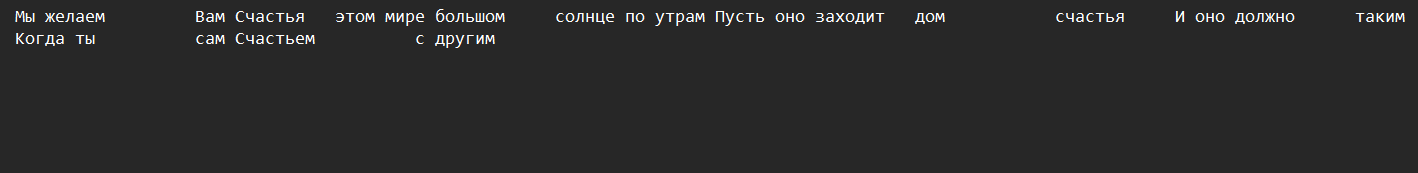